<a href="https://colab.research.google.com/github/TheAlfonzReyes/Taxis-electricos-NYC/blob/main/ETL_EDA_Electric_and_Alternative_Fuel_Charging_Stations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [825]:
import pandas as pd
import pyarrow
import gzip

In [826]:
archivo = '/content/drive/MyDrive/Proyecto final/Electric and Alternative Fuel Charging Stations.csv'

In [827]:
df = pd.read_csv(archivo, encoding='utf-8')

<ipython-input-827-d71ae3eaf404>:1: DtypeWarning: Columns (6,16,20,31,33,36,39,40,41,43,46,52,53,55,57,58,60,62) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(archivo, encoding='utf-8')


Realizamos un análisis preliminar del df.

In [828]:
df.head(3)

Fuel Type Code                                  Station Name  \
0            CNG          Spire - Montgomery Operations Center   
1            CNG                           PS Energy - Atlanta   
2            CNG  Metropolitan Atlanta Rapid Transit Authority   

        Street Address                            Intersection Directions  \
0     2951 Chestnut St                                                NaN   
1     340 Whitehall St  From I-7585 N, exit 91 to Central Ave, left on...   
2  2424 Piedmont Rd NE                                                NaN   

         City State    ZIP  Plus4 Station Phone Status Code  ...  \
0  Montgomery    AL  36107    NaN           NaN           E  ...   
1     Atlanta    GA  30303    NaN  770-350-3000           E  ...   
2     Atlanta    GA  30324    NaN           NaN           E  ...   

  EV Pricing (French) LPG Nozzle Types Hydrogen Pressures Hydrogen Standards  \
0                 NaN              NaN                NaN                NaN   
1                 NaN              NaN                NaN                NaN   
2                 NaN              NaN                NaN                NaN   

  CNG Fill Type Code CNG PSI CNG Vehicle Class  LNG Vehicle Class  \
0                  B    3600                MD                NaN   
1                  Q    3600                MD                NaN   
2                  Q    3000                LD                NaN   

   EV On-Site Renewable Source  Restricted Access  
0                          NaN                NaN  
1                          NaN              False  
2                          NaN                NaN  

[3 rows x 65 columns]

In [829]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70406 entries, 0 to 70405
Data columns (total 65 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Fuel Type Code                    70406 non-null  object 
 1   Station Name                      70406 non-null  object 
 2   Street Address                    70405 non-null  object 
 3   Intersection Directions           4493 non-null   object 
 4   City                              70406 non-null  object 
 5   State                             70406 non-null  object 
 6   ZIP                               70405 non-null  object 
 7   Plus4                             0 non-null      float64
 8   Station Phone                     65204 non-null  object 
 9   Status Code                       70406 non-null  object 
 10  Expected Date                     1218 non-null   object 
 11  Groups With Access Code           70406 non-null  object 
 12  Acce

In [830]:
df.describe()

Plus4  EV Level1 EVSE Num  EV Level2 EVSE Num  EV DC Fast Count  \
count    0.0          286.000000        54144.000000       8307.000000   
mean     NaN            3.461538            2.315289          3.576381   
std      NaN            6.548356            3.157387          4.129470   
min      NaN            1.000000            1.000000          1.000000   
25%      NaN            1.000000            2.000000          1.000000   
50%      NaN            1.000000            2.000000          2.000000   
75%      NaN            2.000000            2.000000          4.000000   
max      NaN           51.000000          311.000000         56.000000   

           Latitude     Longitude             ID  Federal Agency ID  \
count  70406.000000  70406.000000   70406.000000         955.000000   
mean      38.929309    -96.061447  148730.326066          13.905759   
std        5.628458     19.545273   54261.672118           6.767439   
min        0.000000   -159.788556      17.000000           2.000000   
25%       34.182981   -117.860563  113723.250000           8.000000   
50%       39.105989    -92.002897  165247.500000          14.000000   
75%       42.702185    -78.881493  190653.750000          17.000000   
max       64.852466     40.432278  224382.000000          60.000000   

       CNG Dispenser Num  CNG Total Compression Capacity  CNG Storage Capacity  
count        1039.000000                      708.000000            357.000000  
mean            2.731473                      873.766949          47866.787115  
std             8.333492                     1032.371466          54327.698853  
min             0.000000                        2.000000              0.000000  
25%             1.000000                      215.750000          30000.000000  
50%             2.000000                      632.000000          36000.000000  
75%             2.000000                     1100.000000          60000.000000  
max           202.000000                    10620.000000         593136.000000

In [831]:
df.shape

(70406, 65)

In [832]:
df.columns

Index(['Fuel Type Code', 'Station Name', 'Street Address',
       'Intersection Directions', 'City', 'State', 'ZIP', 'Plus4',
       'Station Phone', 'Status Code', 'Expected Date',
       'Groups With Access Code', 'Access Days Time', 'Cards Accepted',
       'BD Blends', 'NG Fill Type Code', 'NG PSI', 'EV Level1 EVSE Num',
       'EV Level2 EVSE Num', 'EV DC Fast Count', 'EV Other Info', 'EV Network',
       'EV Network Web', 'Geocode Status', 'Latitude', 'Longitude',
       'Date Last Confirmed', 'ID', 'Updated At', 'Owner Type Code',
       'Federal Agency ID', 'Federal Agency Name', 'Open Date',
       'Hydrogen Status Link', 'NG Vehicle Class', 'LPG Primary',
       'E85 Blender Pump', 'EV Connector Types', 'Country',
       'Intersection Directions (French)', 'Access Days Time (French)',
       'BD Blends (French)', 'Groups With Access Code (French)',
       'Hydrogen Is Retail', 'Access Code', 'Access Detail Code',
       'Federal Agency Code', 'Facility Type', 'CNG Dispenser N

Vemos, a priori, que hay muchas columnas que no nos van a servir para el proyecto, por lo que procedemos a borrarlas.

In [833]:
columnas_a_borrar = ['Station Name', 'Street Address', 'ZIP', 'Plus4', 'Station Phone', 'EV Network Web', 'Open Date', 'Hydrogen Status Link',
                     'Intersection Directions (French)', 'Access Days Time (French)', 'BD Blends (French)', 'Groups With Access Code (French)',
                     'Hydrogen Is Retail', 'EV Pricing (French)', ]

In [834]:
df = df.drop(columnas_a_borrar, axis=1)

Hay otras columnas que no sabemos. Antes de borrarlas, analizamos su contenido.

In [835]:
columnas_a_analizar = ['Groups With Access Code', 'Intersection Directions', 'Cards Accepted', 'NG PSI', 'EV Other Info', 'EV Network', 'Geocode Status',
              'Date Last Confirmed', 'Updated At', 'Owner Type Code', 'Federal Agency ID', 'Federal Agency Name',
              'NG Vehicle Class', 'LPG Primary',  'Access Code', 'Access Detail Code', 'Federal Agency Code',
              'Facility Type', 'CNG Fill Type Code', 'EV On-Site Renewable Source', 'Restricted Access']

In [836]:
for columna in columnas_a_analizar:
    print(f'\n\nColumna: {columna}\n{df[columna].unique()}\n')



Columna: Groups With Access Code
['Private' 'Public - Card key at all times' 'Private - Government only'
 'Public - Credit card at all times' 'TEMPORARILY UNAVAILABLE (Public)'
 'TEMPORARILY UNAVAILABLE (Public - Credit card at all times)'
 'Private - Fleet customers only' 'Public'
 'Public - Credit card after hours' 'TEMPORARILY UNAVAILABLE (Private)'
 'Private - Card key at all times' 'Public - Call ahead'
 'Public - Card key after hours'
 'TEMPORARILY UNAVAILABLE (Public - Credit card after hours)'
 'TEMPORARILY UNAVAILABLE (Public - Call ahead)'
 'TEMPORARILY UNAVAILABLE (Private - Government only)'
 'PLANNED - not yet accessible (Public - Credit card at all times)'
 'PLANNED - not yet accessible (Private - Government only)'
 'Public - Limited hours' 'PLANNED - not yet accessible (Public)'
 'PLANNED - not yet accessible (Public - Call ahead)'
 'Private - Call ahead' 'Private - Credit card at all times'
 'PLANNED - not yet accessible (Private)' 'Public - Fleet customers only'
 'TE

Vemos que algunas pueden llegar a servir:

'Geocode Status'

'Access Code'

Pero podemos borrar las otras.

In [837]:
columnas_a_borrar = ['Groups With Access Code', 'Intersection Directions', 'Cards Accepted', 'NG PSI', 'EV Other Info', 'EV Network',
              'Date Last Confirmed', 'Updated At', 'Owner Type Code', 'Federal Agency ID', 'Federal Agency Name',
              'NG Vehicle Class', 'LPG Primary', 'Access Detail Code', 'Federal Agency Code',
              'Facility Type', 'CNG Fill Type Code', 'EV On-Site Renewable Source', 'Restricted Access']

In [838]:
df = df.drop(columnas_a_borrar, axis=1)

La columna 'Acces Days Time' indica los horarios de atención. Vamos a analizarla:

In [839]:
df['Access Days Time'].unique()

array([nan, '24 hours daily',
       '24 hours daily; call 866-809-4869 for Clean Energy card', ...,
       '7:30am-7pm M-F; 8am-6pm Sat; Closed Sunday',
       '24 hours daily; Phone App',
       'Mon 7:00am - 6:00pm; Tue 7:00am - 6:00pm; Wed 7:00am - 6:00pm; Thu 7:00am - 6:00pm; Fri 7:00am - 6:00pm'],
      dtype=object)

In [840]:
df['Access Days Time'].nunique()

2552

Vemos que tiene muchos valores únicos. Vamos a reemplazar todos los que contengan '24' y luego volvemos a analizar.

In [841]:
df['Access Days Time'] = df['Access Days Time'].astype(str)

In [842]:
def reemplazar_24_horas(horario:str) -> str:
    if '24' in horario:
        return '24 hours daily'
    else:
        return horario

In [843]:
df['Access Days Time'] = df['Access Days Time'].apply(reemplazar_24_horas)

In [844]:
df['Access Days Time'].nunique()

1914

Vemos que sigue teniendo muchos valores únicos y, para el contexto de nuestro proyecto, no va a ser una columna relevante.

In [845]:
df = df.drop(['Access Days Time'], axis=1)

Verificamos valores únicos de estados y ciudades:

In [846]:
df['City'].unique()

array(['Montgomery', 'Atlanta', 'Fort Smith', ..., 'New Minas',
       'Herriman', 'Bluffdale'], dtype=object)

In [847]:
df['City'].nunique()

8278

In [848]:
df['State'].unique()

array(['AL', 'GA', 'AR', 'MA', 'NY', 'IN', 'WY', 'CT', 'LA', 'NM', 'KS',
       'ID', 'MO', 'TX', 'UT', 'MN', 'NE', 'CO', 'OR', 'OK', 'PA', 'CA',
       'FL', 'SC', 'NC', 'AZ', 'NV', 'VA', 'MD', 'WA', 'TN', 'SD', 'IA',
       'IL', 'MI', 'ND', 'NJ', 'MS', 'OH', 'MT', 'RI', 'NH', 'WV', 'WI',
       'HI', 'VT', 'AK', 'ME', 'KY', 'DC', 'DE', 'AB', 'QC', 'MB', 'SK',
       'ON', 'BC', 'NL', 'PE', 'NB', 'NS', 'NT', 'YT', 'PR', 'MX'],
      dtype=object)

Como el alcance de nuestro proyecto es la Ciudad de New York y viajes de corta distancia, no necesitamos datos de estaciones de carga de todo el país. En principio, dejamos solo los datos del estado de New York y estados limítrofes (New York, Connecticut, Massachusetts, New Jersey, Rhode Island, Pensilvania, Vermont). La idea es ir filtrando más a medida que avanza el proyecto.

In [849]:
estados_cercanos = ['NY', 'CT', 'MA', 'NJ', 'RI', 'PA', 'VT']

In [850]:
df.shape

(70406, 31)

Verificamos cuántos registros tenemos en esos estados:

In [851]:
df[df['State'].isin(estados_cercanos)].shape

(9479, 31)

De los 70406 registros solo 9479 son del estado de NY y estados limítrofes. Borramos los otros.

In [852]:
df = df.drop(df[~df['State'].isin(estados_cercanos)].index)

In [853]:
df.shape

(9479, 31)

Exploramos la columna 'Expected Date'.

In [854]:
df['Expected Date'].unique()

array([nan, '2022-07-15', '2022-05-15', '2022-06-15', '2022-03-15',
       '2022-04-15', '2022-06-13', '2022-07-31', '2022-12-01',
       '2023-02-15', '2023-05-24', '2022-07-01', '2022-07-10',
       '2023-05-15', '2022-03-30', '2021-04-30', '2022-02-01',
       '2021-07-31', '2021-04-29', '2021-06-30', '2021-11-30',
       '2022-04-14', '2022-06-30'], dtype=object)

In [855]:
df['Expected Date'].nunique()

22

Observarmos que no hay fechas esperadas posteriores a 2023, por lo que borramos la columna.

In [856]:
df = df.drop('Expected Date', axis=1)

Exploramos la columna 'Status Code'.

In [857]:
df['Status Code'].unique()

array(['E', 'T', 'P'], dtype=object)

'Status Code' es un dato temporal que se refiere al estado de la estación de carga. E: en uso; T: disponible; P: fuera de servicio. Puede servir para la carga de datos, pero solo si se actualizan con mucha frecuencia. No va a ser el caso, por lo que también la borramos.

In [858]:
df = df.drop('Status Code', axis=1)

In [859]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9479 entries, 5 to 70395
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Fuel Type Code                  9479 non-null   object 
 1   City                            9479 non-null   object 
 2   State                           9479 non-null   object 
 3   BD Blends                       36 non-null     object 
 4   NG Fill Type Code               203 non-null    object 
 5   EV Level1 EVSE Num              34 non-null     float64
 6   EV Level2 EVSE Num              8197 non-null   float64
 7   EV DC Fast Count                799 non-null    float64
 8   Geocode Status                  9479 non-null   object 
 9   Latitude                        9479 non-null   float64
 10  Longitude                       9479 non-null   float64
 11  ID                              9479 non-null   int64  
 12  E85 Blender Pump                2

Verificamos las columnas de latitud y longitud. Sabemos por el método info que no hay valores nulos, pero chequeamos valores atípicos o errores.

El área que vamos a evaluar antes de un filtrado final está delimitada, aproximadamente, por las siguientes coordenadas:

Latitud mínima: 36

Latitud máxima: 45

Longitud mínima: -110

Longitud máxima: -69

In [860]:
df[df['Latitude'] < 36].shape

(0, 29)

In [861]:
df[df['Latitude'] > 45].shape

(3, 29)

In [862]:
df['Latitude'][df['Latitude'] > 45]

10082    45.004475
29456    45.513643
68491    45.457863
Name: Latitude, dtype: float64

Vemos que las latitudes están bien.

In [863]:
df[df['Longitude'] < -110].shape

(1, 29)

In [864]:
df['Longitude'][df['Longitude'] < -110]

29456   -122.833936
Name: Longitude, dtype: float64

In [865]:
df[['Latitude','Longitude']][df['Longitude'] < -110]

Latitude   Longitude
29456  45.513643 -122.833936

In [866]:
df[df['Longitude'] < -122]

Fuel Type Code       City State BD Blends NG Fill Type Code  \
29456           ELEC  Beaverton    RI       NaN               NaN   

       EV Level1 EVSE Num  EV Level2 EVSE Num  EV DC Fast Count  \
29456                 NaN                 2.0               NaN   

      Geocode Status   Latitude  ...  CNG Storage Capacity  \
29456            GPS  45.513643  ...                   NaN   

       LNG On-Site Renewable Source E85 Other Ethanol Blends EV Pricing  \
29456                           NaN                      NaN        NaN   

      LPG Nozzle Types Hydrogen Pressures  Hydrogen Standards CNG PSI  \
29456              NaN                NaN                 NaN     NaN   

       CNG Vehicle Class  LNG Vehicle Class  
29456                NaN                NaN  

[1 rows x 29 columns]

Vemos que el estado está bien pero no la longitud. Como no tenemos el dato exacto, borramos el registro.

In [867]:
df.shape

(9479, 29)

In [868]:
df = df.drop(df[df['Longitude'] < -122].index)

In [869]:
df.shape

(9478, 29)

In [870]:
df[df['Longitude'] > -69].shape

(2, 29)

In [871]:
df[['Latitude', 'Longitude']][df['Longitude'] > -69]

Latitude  Longitude
53136  42.868419   0.000000
69951  40.432278  40.432278

In [872]:
df[df['Longitude'] > -69]

Fuel Type Code          City State BD Blends NG Fill Type Code  \
53136           ELEC  Clifton Park    NY       NaN               NaN   
69951           ELEC    Pittsburgh    PA       NaN               NaN   

       EV Level1 EVSE Num  EV Level2 EVSE Num  EV DC Fast Count  \
53136                 NaN                 4.0               NaN   
69951                 NaN                 2.0               NaN   

      Geocode Status   Latitude  ...  CNG Storage Capacity  \
53136            GPS  42.868419  ...                   NaN   
69951            GPS  40.432278  ...                   NaN   

       LNG On-Site Renewable Source E85 Other Ethanol Blends  \
53136                           NaN                      NaN   
69951                           NaN                      NaN   

                   EV Pricing LPG Nozzle Types Hydrogen Pressures  \
53136                     NaN              NaN                NaN   
69951  Level 2: $0.49 per kWh              NaN                NaN   

       Hydrogen Standards CNG PSI  CNG Vehicle Class  LNG Vehicle Class  
53136                 NaN     NaN                NaN                NaN  
69951                 NaN     NaN                NaN                NaN  

[2 rows x 29 columns]

De nuevo, los estados están bien, pero no las coordenadas. Como no tenemos el dato exacto, borramos los registros.

In [873]:
df.shape

(9478, 29)

In [874]:
df = df.drop(df[df['Longitude'] > -69].index)

In [875]:
df.shape

(9476, 29)

Verificamos:

In [876]:
for latitud in df['Latitude']:
    if latitud < 36 or latitud > 45:
        print(latitud)

45.004475
45.45786273


In [877]:
for latitud in df['Longitude']:
    if latitud < -110 or latitud > -69:
        print(latitud)

Seguimos explorando columnas:

In [878]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9476 entries, 5 to 70395
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Fuel Type Code                  9476 non-null   object 
 1   City                            9476 non-null   object 
 2   State                           9476 non-null   object 
 3   BD Blends                       36 non-null     object 
 4   NG Fill Type Code               203 non-null    object 
 5   EV Level1 EVSE Num              34 non-null     float64
 6   EV Level2 EVSE Num              8194 non-null   float64
 7   EV DC Fast Count                799 non-null    float64
 8   Geocode Status                  9476 non-null   object 
 9   Latitude                        9476 non-null   float64
 10  Longitude                       9476 non-null   float64
 11  ID                              9476 non-null   int64  
 12  E85 Blender Pump                2

Vamos a explorar todas las columnas con datos nulos:

In [879]:
lista_con_nulos = []

In [880]:
for index, row in df.iteritems():
    if df[index].isnull().sum() != 0:
        lista_con_nulos.append(index)

<ipython-input-880-af1ec354d087>:1: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, row in df.iteritems():


In [881]:
for elemento in lista_con_nulos:
    print(f'\n\nColumna: {elemento}\n{df[elemento].unique()}\nValores nulos: {df[elemento].isnull().sum()}')



Columna: BD Blends
[nan 'B20' 'B20 in summer, B5 in winter' 'B99, B20'
 'B30, any blend up to B30 available' 'B20, B5' 'B99, any blend up to B99'
 'B99']
Valores nulos: 9440


Columna: NG Fill Type Code
['Q' 'B' nan 'T']
Valores nulos: 9273


Columna: EV Level1 EVSE Num
[nan  1.  2. 20.  3.  6.  4. 11.]
Valores nulos: 9442


Columna: EV Level2 EVSE Num
[nan  6.  7.  1.  2.  5.  3.  4. 10. 17. 16.  9.  8. 12. 11. 13. 14. 18.
 30. 22. 20. 26. 24. 60. 15. 28.]
Valores nulos: 1282


Columna: EV DC Fast Count
[nan  1.  2.  8. 10. 14. 16.  4.  6. 12. 20. 18.  3. 25.  9.  7.]
Valores nulos: 8677


Columna: E85 Blender Pump
[nan False True]
Valores nulos: 9201


Columna: EV Connector Types
[nan 'J1772' 'J1772 NEMA520' 'J1772 NEMA515' 'CHADEMO J1772 J1772COMBO'
 'CHADEMO J1772' 'CHADEMO J1772COMBO' 'CHADEMO J1772 J1772COMBO TESLA'
 'J1772 J1772COMBO' 'TESLA' 'J1772 TESLA' 'J1772COMBO'
 'J1772 NEMA515 NEMA520' 'CHADEMO' 'J1772 NEMA1450' 'J1772COMBO NEMA515'
 'CHADEMO J1772COMBO TESLA']
Valores

Luego de revisar, borramos las columnas que no son importantes para el alcance del proyecto. Dejamos algunas relacionadas con vehículos eléctricos (como precio de carga) porque pueden llegar a servir, para hacer una transformación de datos.

In [882]:
columnas_a_borrar = ['BD Blends', 'NG Fill Type Code', 'E85 Blender Pump', 'CNG On-Site Renewable Source',
                     'CNG Total Compression Capacity', 'CNG Storage Capacity', 'LNG On-Site Renewable Source',
                     'E85 Other Ethanol Blends', 'Hydrogen Pressures', 'Hydrogen Standards',
                     'CNG PSI', 'CNG Vehicle Class', 'LNG Vehicle Class']

In [883]:
df.shape

(9476, 29)

In [884]:
df = df.drop(columnas_a_borrar, axis=1)

In [885]:
df.shape

(9476, 16)

Ordenamos las columnas y borramos algunas que notamos que son irrelevantes al ir avanzando con el análisis.

In [886]:
df.columns

Index(['Fuel Type Code', 'City', 'State', 'EV Level1 EVSE Num',
       'EV Level2 EVSE Num', 'EV DC Fast Count', 'Geocode Status', 'Latitude',
       'Longitude', 'ID', 'EV Connector Types', 'Country', 'Access Code',
       'CNG Dispenser Num', 'EV Pricing', 'LPG Nozzle Types'],
      dtype='object')

In [887]:
df = df[['ID', 'Fuel Type Code', 'Access Code', 'Geocode Status', 'Latitude', 'Longitude', 'City', 'State',
         'EV Level1 EVSE Num', 'EV Level2 EVSE Num', 'EV DC Fast Count', 'EV Connector Types', 'EV Pricing',
         'CNG Dispenser Num', 'LPG Nozzle Types']]

In [888]:
df.head()

ID Fuel Type Code Access Code Geocode Status   Latitude  Longitude  \
5   81            CNG      public            GPS  42.374706 -71.026549   
6   84            CNG      public          200-8  42.393167 -71.064352   
7  108            CNG      public          200-8  40.718037 -73.932309   
8  112            CNG      public          200-8  40.645540 -73.918344   
9  124            CNG      public          200-9  40.752903 -74.005831   

          City State  EV Level1 EVSE Num  EV Level2 EVSE Num  \
5  East Boston    MA                 NaN                 NaN   
6      Everett    MA                 NaN                 NaN   
7     Brooklyn    NY                 NaN                 NaN   
8     Brooklyn    NY                 NaN                 NaN   
9     New York    NY                 NaN                 NaN   

   EV DC Fast Count EV Connector Types EV Pricing  CNG Dispenser Num  \
5               NaN                NaN        NaN                4.0   
6               NaN                NaN        NaN                1.0   
7               NaN                NaN        NaN                1.0   
8               NaN                NaN        NaN                1.0   
9               NaN                NaN        NaN                1.0   

  LPG Nozzle Types  
5              NaN  
6              NaN  
7              NaN  
8              NaN  
9              NaN

In [889]:
df.shape

(9476, 15)

In [890]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9476 entries, 5 to 70395
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  9476 non-null   int64  
 1   Fuel Type Code      9476 non-null   object 
 2   Access Code         9476 non-null   object 
 3   Geocode Status      9476 non-null   object 
 4   Latitude            9476 non-null   float64
 5   Longitude           9476 non-null   float64
 6   City                9476 non-null   object 
 7   State               9476 non-null   object 
 8   EV Level1 EVSE Num  34 non-null     float64
 9   EV Level2 EVSE Num  8194 non-null   float64
 10  EV DC Fast Count    799 non-null    float64
 11  EV Connector Types  8850 non-null   object 
 12  EV Pricing          2282 non-null   object 
 13  CNG Dispenser Num   131 non-null    float64
 14  LPG Nozzle Types    96 non-null     object 
dtypes: float64(6), int64(1), object(8)
memory usage: 1.2+ 

Observamos que tenemos muchos valores nulos, pero es porque algunas columnas no aplican para todos los combustibles. Vamos a crear un df para cada tipo de combustible y analizarlo en función de esa clasificación.

In [891]:
archivo_limpio = '/content/drive/MyDrive/Proyecto final/general_limpio/Electric and Alternative Fuel Charging Stations_general_limpio'

In [892]:
df.to_excel(archivo_limpio + '.xlsx', encoding='utf-8')
df.to_csv(archivo_limpio + '.csv', encoding='utf-8')
df.to_json(archivo_limpio + '.json.gz', compression='gzip')
df.to_parquet(archivo_limpio + '.parquet', engine='pyarrow')

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning: the 'encoding' keyword is deprecated and will be removed in a future version. Please take steps to stop the use of 'encoding'
  return func(*args, **kwargs)


In [893]:
df['Fuel Type Code'].unique()

array(['CNG', 'LPG', 'BD', 'E85', 'ELEC', 'LNG', 'HY'], dtype=object)

df[['ID', 'Fuel Type Code', 'Access Code', 'Geocode Status', 'Latitude', 'Longitude', 'City', 'State',
         'EV Level1 EVSE Num', 'EV Level2 EVSE Num', 'EV DC Fast Count', 'EV Connector Types', 'EV Pricing', 'CNG Dispenser Num']]

In [894]:
df_cng = df[['ID', 'Fuel Type Code', 'Access Code', 'Geocode Status', 'Latitude', 'Longitude', 'City', 'State', 'CNG Dispenser Num']][df['Fuel Type Code'] == 'CNG']
df_lpg = df[['ID', 'Fuel Type Code', 'Access Code', 'Geocode Status', 'Latitude', 'Longitude', 'City', 'State', 'LPG Nozzle Types']][df['Fuel Type Code'] == 'LPG']
df_bd = df[['ID', 'Fuel Type Code', 'Access Code', 'Geocode Status', 'Latitude', 'Longitude', 'City', 'State']][df['Fuel Type Code'] == 'BD']
df_e85 = df[['ID', 'Fuel Type Code', 'Access Code', 'Geocode Status', 'Latitude', 'Longitude', 'City', 'State']][df['Fuel Type Code'] == 'E85']
df_elec = df[['ID', 'Fuel Type Code', 'Access Code', 'Geocode Status', 'Latitude', 'Longitude', 'City', 'State', 'EV Level1 EVSE Num', 'EV Level2 EVSE Num', 'EV DC Fast Count', 'EV Connector Types', 'EV Pricing']][df['Fuel Type Code'] == 'ELEC']
df_lng = df[['ID', 'Fuel Type Code', 'Access Code', 'Geocode Status', 'Latitude', 'Longitude', 'City', 'State']][df['Fuel Type Code'] == 'LNG']
df_hy = df[['ID', 'Fuel Type Code', 'Access Code', 'Geocode Status', 'Latitude', 'Longitude', 'City', 'State']][df['Fuel Type Code'] == 'HY']


# Revisión de valores nulos, duplicados y outliers por tipo de estación de carga

# df_cng

In [895]:
df_cng.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 207 entries, 5 to 56495
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 207 non-null    int64  
 1   Fuel Type Code     207 non-null    object 
 2   Access Code        207 non-null    object 
 3   Geocode Status     207 non-null    object 
 4   Latitude           207 non-null    float64
 5   Longitude          207 non-null    float64
 6   City               207 non-null    object 
 7   State              207 non-null    object 
 8   CNG Dispenser Num  131 non-null    float64
dtypes: float64(3), int64(1), object(5)
memory usage: 16.2+ KB


Nulos:

In [896]:
df_cng[df_cng['CNG Dispenser Num'].isnull()]

ID Fuel Type Code Access Code Geocode Status   Latitude  Longitude  \
127      1252            CNG     private          200-9  40.729540 -73.607500   
210     12788            CNG     private          200-8  40.008558 -75.280726   
661     20908            CNG     private          200-8  40.199940 -80.003416   
701     21435            CNG     private          200-9  43.169231 -77.661407   
810     23208            CNG     private            GPS  40.730667 -74.039876   
...       ...            ...         ...            ...        ...        ...   
36111  167132            CNG     private            GPS  41.077924 -75.323657   
36439  167606            CNG     private          200-9  40.346862 -79.759130   
51259  187475            CNG     private            GPS  40.208116 -76.840282   
51806  189034            CNG     private          200-9  42.866539 -78.831713   
56495  196516            CNG     private          200-9  39.944688 -76.793636   

                   City State  CNG Dispenser Num  
127         Garden City    NY                NaN  
210             Ardmore    PA                NaN  
661         Finleyville    PA                NaN  
701           Rochester    NY                NaN  
810         Jersey City    NJ                NaN  
...                 ...   ...                ...  
36111        Swiftwater    PA                NaN  
36439  North Huntingdon    PA                NaN  
51259    New Cumberland    PA                NaN  
51806           Buffalo    NY                NaN  
56495              York    PA                NaN  

[76 rows x 9 columns]

Tenemos nulos en la disponibilidad de carga, pero los dejamos porque nos interesa la ubicación. Solo transformamos los nulos a -1.

In [897]:
def entero(valor:float) -> int:
    if pd.isnull(valor):
        return int(-1)
    else:
        return int(valor)

In [898]:
df_cng['CNG Dispenser Num'] = df_cng['CNG Dispenser Num'].apply(entero)

Verificamos:

In [899]:
df_cng.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 207 entries, 5 to 56495
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 207 non-null    int64  
 1   Fuel Type Code     207 non-null    object 
 2   Access Code        207 non-null    object 
 3   Geocode Status     207 non-null    object 
 4   Latitude           207 non-null    float64
 5   Longitude          207 non-null    float64
 6   City               207 non-null    object 
 7   State              207 non-null    object 
 8   CNG Dispenser Num  207 non-null    int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 16.2+ KB


In [900]:
df_cng.sample(10)

ID Fuel Type Code Access Code Geocode Status   Latitude  Longitude  \
660     20905            CNG      public          200-9  41.901602 -70.975499   
22450  123710            CNG     private          200-9  41.429396 -75.615656   
5886    52998            CNG     private          200-8  42.338197 -71.057123   
10316   79256            CNG     private          200-9  40.822890 -73.841375   
1988    35135            CNG     private          200-9  42.331874 -71.064222   
1958    35060            CNG     private          200-8  40.808151 -73.902589   
6525    60840            CNG     private          200-9  41.116716 -74.120396   
343     18900            CNG      public          200-8  40.648881 -73.707638   
2959    41175            CNG     private          200-9  40.453507 -80.085371   
22458  123718            CNG     private          200-9  40.336220 -75.610547   

                City State  CNG Dispenser Num  
660    Middleborough    MA                  1  
22450        Dunmore    PA                 -1  
5886          Boston    MA                 -1  
10316          Bronx    NY                 -1  
1988          Boston    MA                 -1  
1958           Bronx    NY                 -1  
6525         Suffern    NY                 -1  
343    Valley Stream    NY                  1  
2959      Pittsburgh    PA                 -1  
22458  Gilbertsville    PA                 -1

Duplicados:

In [901]:
df_cng.duplicated().sum()

0

Ouliers:

In [902]:
df_cng['CNG Dispenser Num'][df_cng['CNG Dispenser Num'] != -1].describe()

count    131.000000
mean       2.175573
std        3.537667
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max       40.000000
Name: CNG Dispenser Num, dtype: float64

In [903]:
q1 = df_cng['CNG Dispenser Num'][df_cng['CNG Dispenser Num'] != -1].quantile(0.25)
q3 = df_cng['CNG Dispenser Num'][df_cng['CNG Dispenser Num'] != -1].quantile(0.75)
iqr = q3 - q1
limite_superior = q3 + 1.5 * iqr
outliers = df_cng[['ID', 'CNG Dispenser Num']][df_cng['CNG Dispenser Num'] > limite_superior]
print(f'Límite superior: {limite_superior}\nOutliers: {outliers}')

Límite superior: 3.5
Outliers:            ID  CNG Dispenser Num
5          81                  4
2225    36309                  4
4602    48010                  4
4867    48907                 40
6485    60684                  4
7505    64057                  4
8394    67844                  4
20865  117871                  4
29967  155590                  4
51687  188087                 12


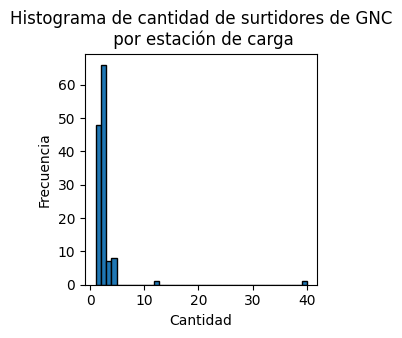

In [904]:
plt.figure(figsize=(3,3))
plt.hist(df_cng['CNG Dispenser Num'][df_cng['CNG Dispenser Num'] != -1], bins=40, edgecolor='black')
plt.title('Histograma de cantidad de surtidores de GNC\n por estación de carga')
plt.xlabel('Cantidad')
plt.ylabel('Frecuencia')
plt.show()

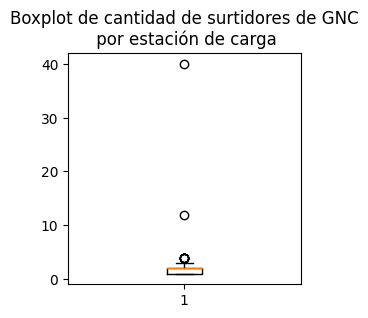

In [905]:
plt.figure(figsize=(3,3))
plt.boxplot(df_cng['CNG Dispenser Num'][df_cng['CNG Dispenser Num'] != -1])
plt.title('Boxplot de cantidad de surtidores de GNC\n por estación de carga')
plt.show()

Matemáticamente tenemos outliers, pero eso no significa que sean errores. Revisando Google Maps y otras fuentes, solo el que indica 40 es un valor erróneo. Lo reemplazamos con la mediana para fines estadísticos.

In [906]:
df_cng[df_cng['CNG Dispenser Num'] == 40]

ID Fuel Type Code Access Code Geocode Status   Latitude  Longitude  \
4867  48907            CNG     private          200-9  43.182614 -78.984194   

          City State  CNG Dispenser Num  
4867  Lewiston    NY                 40

In [907]:
df_cng.loc[4867, 'CNG Dispenser Num'] = int(df_cng['CNG Dispenser Num'][df_cng['CNG Dispenser Num'] != -1].median())

In [908]:
df_cng.loc[4867, 'CNG Dispenser Num']

2

In [909]:
df_cng.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 207 entries, 5 to 56495
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 207 non-null    int64  
 1   Fuel Type Code     207 non-null    object 
 2   Access Code        207 non-null    object 
 3   Geocode Status     207 non-null    object 
 4   Latitude           207 non-null    float64
 5   Longitude          207 non-null    float64
 6   City               207 non-null    object 
 7   State              207 non-null    object 
 8   CNG Dispenser Num  207 non-null    int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 24.3+ KB


In [910]:
archivo_cng_limpio = '/content/drive/MyDrive/Proyecto final/general_limpio/cng/cng'

In [911]:
df_cng.to_excel(archivo_cng_limpio + '.xlsx', encoding='utf-8')
df_cng.to_csv(archivo_cng_limpio + '.csv', encoding='utf-8')
df_cng.to_json(archivo_cng_limpio + '.json.gz', compression='gzip')
df_cng.to_parquet(archivo_cng_limpio + '.parquet', engine='pyarrow')

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning: the 'encoding' keyword is deprecated and will be removed in a future version. Please take steps to stop the use of 'encoding'
  return func(*args, **kwargs)


# df_lpg

In [912]:
df_lpg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96 entries, 230 to 65372
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                96 non-null     int64  
 1   Fuel Type Code    96 non-null     object 
 2   Access Code       96 non-null     object 
 3   Geocode Status    96 non-null     object 
 4   Latitude          96 non-null     float64
 5   Longitude         96 non-null     float64
 6   City              96 non-null     object 
 7   State             96 non-null     object 
 8   LPG Nozzle Types  96 non-null     object 
dtypes: float64(2), int64(1), object(6)
memory usage: 7.5+ KB


Nulos: no se observan.

Duplicados:

In [913]:
df_lpg.duplicated().sum()

0

Outliers: los únicos datos numéricos son latitud y longitud, que se trataron previamente.

In [914]:
archivo_lpg_limpio = '/content/drive/MyDrive/Proyecto final/general_limpio/lpg/lpg'

In [915]:
df_lpg.to_excel(archivo_lpg_limpio + '.xlsx', encoding='utf-8')
df_lpg.to_csv(archivo_lpg_limpio + '.csv', encoding='utf-8')
df_lpg.to_json(archivo_lpg_limpio + '.json.gz', compression='gzip')
df_lpg.to_parquet(archivo_lpg_limpio + '.parquet', engine='pyarrow')

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning: the 'encoding' keyword is deprecated and will be removed in a future version. Please take steps to stop the use of 'encoding'
  return func(*args, **kwargs)


# df_bd

In [916]:
df_bd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36 entries, 1046 to 60481
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              36 non-null     int64  
 1   Fuel Type Code  36 non-null     object 
 2   Access Code     36 non-null     object 
 3   Geocode Status  36 non-null     object 
 4   Latitude        36 non-null     float64
 5   Longitude       36 non-null     float64
 6   City            36 non-null     object 
 7   State           36 non-null     object 
dtypes: float64(2), int64(1), object(5)
memory usage: 2.5+ KB


Nulos: no se observan.

Duplicados:

In [917]:
df_bd.duplicated().sum()

0

Outliers: los únicos datos numéricos son latitud y longitud, que se trataron previamente.

In [918]:
archivo_limpio_bd = '/content/drive/MyDrive/Proyecto final/general_limpio/bd/bd'

In [919]:
df_bd.to_excel(archivo_limpio_bd + '.xlsx', encoding='utf-8')
df_bd.to_csv(archivo_limpio_bd + '.csv', encoding='utf-8')
df_bd.to_json(archivo_limpio_bd + '.json.gz', compression='gzip')
df_bd.to_parquet(archivo_limpio_bd + '.parquet', engine='pyarrow')

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning: the 'encoding' keyword is deprecated and will be removed in a future version. Please take steps to stop the use of 'encoding'
  return func(*args, **kwargs)


# df_e85

In [920]:
df_e85.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 275 entries, 1139 to 67623
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              275 non-null    int64  
 1   Fuel Type Code  275 non-null    object 
 2   Access Code     275 non-null    object 
 3   Geocode Status  275 non-null    object 
 4   Latitude        275 non-null    float64
 5   Longitude       275 non-null    float64
 6   City            275 non-null    object 
 7   State           275 non-null    object 
dtypes: float64(2), int64(1), object(5)
memory usage: 19.3+ KB


Nulos: no se observan.

Duplicados:

In [921]:
df_e85.duplicated().sum()

0

Outliers: los únicos datos numéricos son latitud y longitud, que se trataron previamente.

In [922]:
archivo_e85_limpio = '/content/drive/MyDrive/Proyecto final/general_limpio/e85/e85'

In [923]:
df_e85.to_excel(archivo_e85_limpio + '.xlsx', encoding='utf-8')
df_e85.to_csv(archivo_e85_limpio + '.csv', encoding='utf-8')
df_e85.to_json(archivo_e85_limpio + '.json.gz', compression='gzip')
df_e85.to_parquet(archivo_e85_limpio + '.parquet', engine='pyarrow')

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning: the 'encoding' keyword is deprecated and will be removed in a future version. Please take steps to stop the use of 'encoding'
  return func(*args, **kwargs)


# df_lng

In [924]:
df_lng.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 3237 to 9909
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              5 non-null      int64  
 1   Fuel Type Code  5 non-null      object 
 2   Access Code     5 non-null      object 
 3   Geocode Status  5 non-null      object 
 4   Latitude        5 non-null      float64
 5   Longitude       5 non-null      float64
 6   City            5 non-null      object 
 7   State           5 non-null      object 
dtypes: float64(2), int64(1), object(5)
memory usage: 360.0+ bytes


Nulos: no se observan.

Duplicados:

In [925]:
df_lng.duplicated().sum()

0

Outliers: los únicos datos numéricos son latitud y longitud, que se trataron previamente.

In [926]:
archivo_lng_limpio = '/content/drive/MyDrive/Proyecto final/general_limpio/lng/lng'

In [927]:
df_lng.to_excel(archivo_lng_limpio + '.xlsx', encoding='utf-8')
df_lng.to_csv(archivo_lng_limpio + '.csv', encoding='utf-8')
df_lng.to_json(archivo_lng_limpio + '.json.gz', compression='gzip')
df_lng.to_parquet(archivo_lng_limpio + '.parquet', engine='pyarrow')

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning: the 'encoding' keyword is deprecated and will be removed in a future version. Please take steps to stop the use of 'encoding'
  return func(*args, **kwargs)


# df_hy

In [928]:
df_hy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 6904 to 14759
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              5 non-null      int64  
 1   Fuel Type Code  5 non-null      object 
 2   Access Code     5 non-null      object 
 3   Geocode Status  5 non-null      object 
 4   Latitude        5 non-null      float64
 5   Longitude       5 non-null      float64
 6   City            5 non-null      object 
 7   State           5 non-null      object 
dtypes: float64(2), int64(1), object(5)
memory usage: 360.0+ bytes


Nulos: no se observan.

Duplicados:

In [929]:
df_hy.duplicated().sum()

0

Outliers: los únicos datos numéricos son latitud y longitud, que se trataron previamente.

In [930]:
archivo_hy_limpio = '/content/drive/MyDrive/Proyecto final/general_limpio/hy/hy'

In [931]:
df_hy.to_excel(archivo_hy_limpio + '.xlsx', encoding='utf-8')
df_hy.to_csv(archivo_hy_limpio + '.csv', encoding='utf-8')
df_hy.to_json(archivo_hy_limpio + '.json.gz', compression='gzip')
df_hy.to_parquet(archivo_hy_limpio + '.parquet', engine='pyarrow')

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning: the 'encoding' keyword is deprecated and will be removed in a future version. Please take steps to stop the use of 'encoding'
  return func(*args, **kwargs)


# df_elec

In [932]:
df_elec.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8852 entries, 1528 to 70395
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  8852 non-null   int64  
 1   Fuel Type Code      8852 non-null   object 
 2   Access Code         8852 non-null   object 
 3   Geocode Status      8852 non-null   object 
 4   Latitude            8852 non-null   float64
 5   Longitude           8852 non-null   float64
 6   City                8852 non-null   object 
 7   State               8852 non-null   object 
 8   EV Level1 EVSE Num  34 non-null     float64
 9   EV Level2 EVSE Num  8194 non-null   float64
 10  EV DC Fast Count    799 non-null    float64
 11  EV Connector Types  8850 non-null   object 
 12  EV Pricing          2282 non-null   object 
dtypes: float64(5), int64(1), object(7)
memory usage: 968.2+ KB


Nulos:

In [933]:
df_elec['EV Level1 EVSE Num'].unique()

array([nan,  1.,  2., 20.,  3.,  6.,  4., 11.])

Esta columna indica la cantidad de cargadores nivel 1 disponibles en cada estación de carga. Vamos a reemplazar los NaN por 0 y pasar todo a entero. Lo mismo vamos a hacer para los de nivel 2, ya que la especificación implica que hay de un tipo o de otro.

In [934]:
def entero_cero(valor:float) -> int:
    if pd.isnull(valor):
        return int(0)
    else:
        return int(valor)

In [935]:
df_elec['EV Level1 EVSE Num'] = df_elec['EV Level1 EVSE Num'].apply(entero_cero)
df_elec['EV Level2 EVSE Num'] = df_elec['EV Level2 EVSE Num'].apply(entero_cero)

In [936]:
df_elec.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8852 entries, 1528 to 70395
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  8852 non-null   int64  
 1   Fuel Type Code      8852 non-null   object 
 2   Access Code         8852 non-null   object 
 3   Geocode Status      8852 non-null   object 
 4   Latitude            8852 non-null   float64
 5   Longitude           8852 non-null   float64
 6   City                8852 non-null   object 
 7   State               8852 non-null   object 
 8   EV Level1 EVSE Num  8852 non-null   int64  
 9   EV Level2 EVSE Num  8852 non-null   int64  
 10  EV DC Fast Count    799 non-null    float64
 11  EV Connector Types  8850 non-null   object 
 12  EV Pricing          2282 non-null   object 
dtypes: float64(3), int64(3), object(7)
memory usage: 968.2+ KB


In [937]:
df_elec['EV DC Fast Count'].unique()

array([nan,  1.,  2.,  8., 10., 14., 16.,  4.,  6., 12., 20., 18.,  3.,
       25.,  9.,  7.])

Esta columna indica la cantidad de cargadores de cagra rápida disponibles en cada estación. Los datos que no tenemos los vamos a reemplazar por -1 y pasar los resultados a int.

In [938]:
df_elec['EV DC Fast Count'] = df_elec['EV DC Fast Count'].apply(entero)

Verificamos:

In [939]:
df_elec.sample(20)

ID Fuel Type Code Access Code Geocode Status   Latitude  Longitude  \
56728  197191           ELEC      public            GPS  40.186684 -74.656930   
18987  115175           ELEC      public          200-8  40.772931 -73.945552   
27022  149668           ELEC      public            GPS  43.092820 -75.316514   
25498  146772           ELEC      public            GPS  44.379947 -73.228805   
9652    74694           ELEC      public            GPS  40.123547 -74.052784   
21426  121873           ELEC      public            GPS  42.594589 -71.351632   
69640  223116           ELEC      public            GPS  40.672830 -73.971750   
25648  147092           ELEC      public          200-9  42.455457 -71.904659   
24415  143168           ELEC      public            GPS  39.847492 -75.711591   
39539  172055           ELEC      public            GPS  40.701882 -75.288509   
39411  171907           ELEC      public            GPS  42.530810 -71.149414   
27171  149933           ELEC      public            GPS  42.365505 -71.026405   
26075  148081           ELEC      public            GPS  40.518238 -78.399042   
47358  181784           ELEC      public            GPS  42.716551 -71.181775   
66194  216287           ELEC      public            GPS  41.702508 -70.767422   
30006  155662           ELEC      public            GPS  41.559333 -75.716806   
18913  115100           ELEC      public          200-9  40.735404 -74.007717   
58927  200956           ELEC      public            GPS  40.741604 -73.612939   
31049  158570           ELEC      public            GPS  42.619762 -70.854324   
59123  201213           ELEC      public            GPS  42.350230 -71.044869   

                 City State  EV Level1 EVSE Num  EV Level2 EVSE Num  \
56728         Trenton    NJ                   0                   2   
18987        New York    NY                   0                   3   
27022    New Hartford    NY                   0                   2   
25498       Shelburne    VT                   0                   2   
9652        Manasquan    NJ                   0                   0   
21426      Chelmsford    MA                   0                   2   
69640        Brooklyn    NY                   0                   4   
25648       Princeton    MA                   0                   2   
24415  Kennett Square    PA                   0                   2   
39539          Easton    PA                   0                   2   
39411      Wilmington    MA                   0                   2   
27171          Boston    MA                   0                   2   
26075         Altoona    PA                   0                   2   
47358        Lawrence    MA                   0                   2   
66194          Marion    MA                   0                   2   
30006          Dalton    PA                   0                   2   
18913        New York    NY                   0                   3   
58927     Garden City    NY                   0                   0   
31049        Hamilton    MA                   0                   2   
59123          Boston    MA                   0                   2   

       EV DC Fast Count EV Connector Types            EV Pricing  
56728                -1              J1772                   NaN  
18987                -1        J1772 TESLA                  Free  
27022                -1              J1772                   NaN  
25498                -1              J1772                   NaN  
9652                  1         J1772COMBO                   NaN  
21426                -1              J1772                   NaN  
69640                -1              J1772                   NaN  
25648                -1              J1772                  Free  
24415                -1              J1772                   NaN  
39539                -1              J1772                   NaN  
39411                -1              J1772                   NaN  
27171        

In [940]:
df_elec.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8852 entries, 1528 to 70395
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  8852 non-null   int64  
 1   Fuel Type Code      8852 non-null   object 
 2   Access Code         8852 non-null   object 
 3   Geocode Status      8852 non-null   object 
 4   Latitude            8852 non-null   float64
 5   Longitude           8852 non-null   float64
 6   City                8852 non-null   object 
 7   State               8852 non-null   object 
 8   EV Level1 EVSE Num  8852 non-null   int64  
 9   EV Level2 EVSE Num  8852 non-null   int64  
 10  EV DC Fast Count    8852 non-null   int64  
 11  EV Connector Types  8850 non-null   object 
 12  EV Pricing          2282 non-null   object 
dtypes: float64(2), int64(4), object(7)
memory usage: 968.2+ KB


In [941]:
df_elec['EV Pricing'].unique()

array(['Free', nan, '$0.13 per kWh',
       'Free chargers - garage parking rates', '$1 per hour',
       '$3 per session for ticket holders; $1 per hour parking fee',
       'Maximum payment of $15 for customers; Maximum payment of $29.95 for non-customers',
       '$1.50 per hour', '$2 per hour', 'Free; donations accepted',
       '$0.50 per hour', '$0.25 per kWh', 'Free; parking fee',
       'Free; 4 hour limit', '$2 per session',
       'L1: $0.89 per kWh; L2: $1.40 per kWh',
       '$23 early bird (before 9am), $30 after, regardless of charging time. Pay at garage office.',
       'Free; Donations encouraged', 'Variable parking fee',
       'Level 2: $0.59 per kWh', 'Level 2: $0.49 per kWh',
       'Free; pay to park',
       '$1.35 per hour for first 4 hours, $3.00 per hour thereafter',
       '$0.28 per kWh; $0.26 per minute above 60 kW and $0.13 per minute at or below 60 kW',
       '$10 per session', '$0.10 per kWh',
       '$0.18 per kWh for 20 minutes, $20 per hour after; pa

En esta columna, por el momento, solo vamos a completar con -1 los datos faltantes. La idea es procesarla más adelante y hacer la transformación con un poco más de contexto.

In [942]:
def completar(valor:str) -> str:
    if pd.isnull(valor):
        return '-1'
    else:
        return valor

In [943]:
df_elec['EV Pricing'] = df_elec['EV Pricing'].apply(completar)

Verificamos:

In [944]:
df_elec['EV Pricing'].sample(20)

46046                               -1
46916                               -1
61892                               -1
65267                               -1
22300                               -1
30703                               -1
48485                               -1
69699                               -1
52320                             Free
9237                                -1
39115                             FREE
41382                               -1
41186                               -1
7587                              Free
18734                             Free
20736                             Free
40626                               -1
66630    Level 2: $0.03 per 30 seconds
19244                             Free
45978                               -1
Name: EV Pricing, dtype: object

In [945]:
df_elec.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8852 entries, 1528 to 70395
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  8852 non-null   int64  
 1   Fuel Type Code      8852 non-null   object 
 2   Access Code         8852 non-null   object 
 3   Geocode Status      8852 non-null   object 
 4   Latitude            8852 non-null   float64
 5   Longitude           8852 non-null   float64
 6   City                8852 non-null   object 
 7   State               8852 non-null   object 
 8   EV Level1 EVSE Num  8852 non-null   int64  
 9   EV Level2 EVSE Num  8852 non-null   int64  
 10  EV DC Fast Count    8852 non-null   int64  
 11  EV Connector Types  8850 non-null   object 
 12  EV Pricing          8852 non-null   object 
dtypes: float64(2), int64(4), object(7)
memory usage: 968.2+ KB


Duplicados:

In [946]:
df_elec.duplicated().sum()

0

Outliers:

Vamos a analzar las columnas con valores numéricos menos precio, que hay que transformarla.

In [947]:
columnas_a_analizar = ['EV Level1 EVSE Num', 'EV Level2 EVSE Num', 'EV DC Fast Count']

In [948]:
for columna in columnas_a_analizar:
    print(f'\n\nColumna: {columna}\n{df_elec[columna][df_elec[columna] > 0].describe()}')
    # En este caso tomamos mayor a 0 porque a los NaN les asignamos -1 (porque no conocemos los valores). Como en Nivel 1 hay muy
    # pocos valores y a los faltantes se les asignó 0 (entendiendo que es el complemento de Nivel 2), no podemos tomar un promedio real.



Columna: EV Level1 EVSE Num
count    34.000000
mean      2.470588
std       3.636809
min       1.000000
25%       1.000000
50%       1.000000
75%       2.000000
max      20.000000
Name: EV Level1 EVSE Num, dtype: float64


Columna: EV Level2 EVSE Num
count    8194.000000
mean        2.305956
std         1.768624
min         1.000000
25%         2.000000
50%         2.000000
75%         2.000000
max        60.000000
Name: EV Level2 EVSE Num, dtype: float64


Columna: EV DC Fast Count
count    799.000000
mean       4.123905
std        3.852339
min        1.000000
25%        1.000000
50%        2.000000
75%        8.000000
max       25.000000
Name: EV DC Fast Count, dtype: float64


In [949]:
for columna in columnas_a_analizar:
    q1 = df_elec[columna][df_elec[columna] > 0].quantile(0.25)
    q3 = df_elec[columna][df_elec[columna] > 0].quantile(0.75)
    iqr = q3 - q1
    limite_superior = q3 + 1.5 * iqr
    outliers = df_elec[['ID', columna]][df_elec[columna] > limite_superior]
    print(f'\n\nColumna: {columna}\nLímite superior: {limite_superior}\nOutliers: \n{outliers}')



Columna: EV Level1 EVSE Num
Límite superior: 3.5
Outliers: 
           ID  EV Level1 EVSE Num
4519    47804                  20
28597  153028                   6
49665  184854                   4
50090  185492                  11


Columna: EV Level2 EVSE Num
Límite superior: 2.0
Outliers: 
           ID  EV Level2 EVSE Num
1528    32973                   6
2087    35562                   7
2334    36925                   5
2335    36926                   3
2336    36928                   4
...       ...                 ...
69754  223304                   4
69759  223311                   6
69925  223509                  14
69940  223526                   4
70288  224261                  16

[1284 rows x 2 columns]


Columna: EV DC Fast Count
Límite superior: 18.5
Outliers: 
           ID  EV DC Fast Count
15675  102300                20
15702  102330                20
26827  149365                20
55083  194700                25


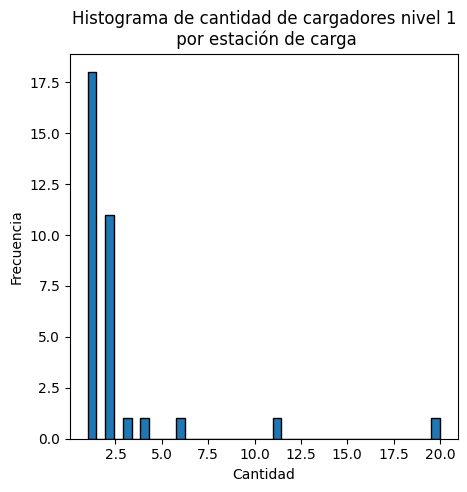

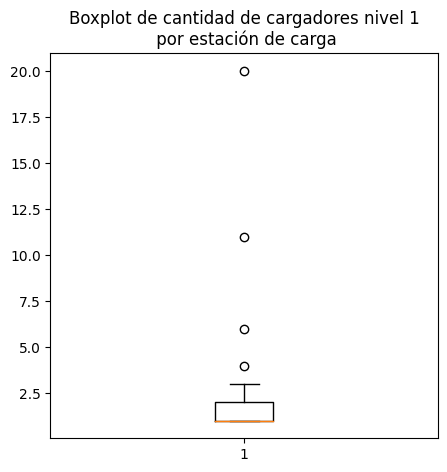

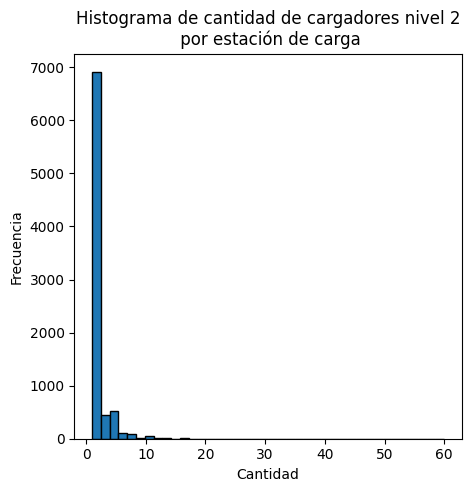

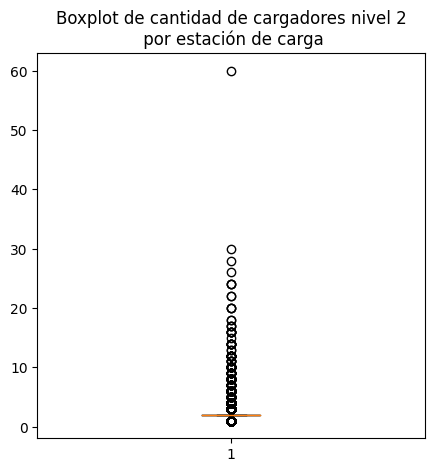

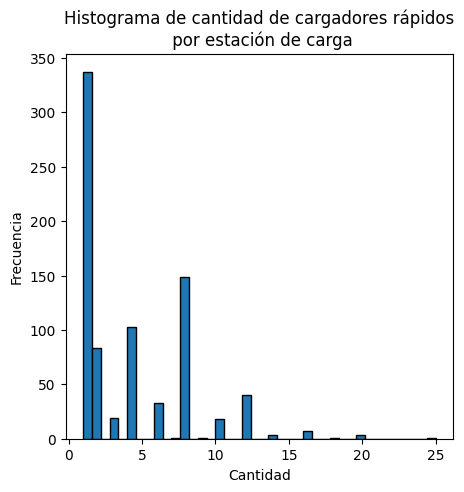

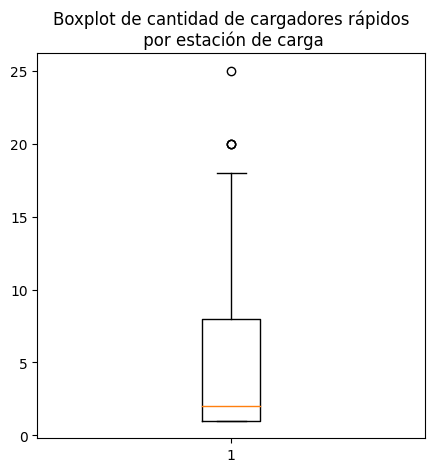

In [950]:
for columna in columnas_a_analizar:
    columnas_español = {'EV Level1 EVSE Num':'cantidad de cargadores nivel 1',
                        'EV Level2 EVSE Num':'cantidad de cargadores nivel 2',
                        'EV DC Fast Count':'cantidad de cargadores rápidos'}
    print()
    print()
    plt.figure(figsize=(5,5))
    plt.hist(df_elec[columna][df_elec[columna] > 0], bins=40, edgecolor='black')
    plt.title(f'Histograma de {columnas_español[columna]}\n por estación de carga')
    plt.xlabel('Cantidad')
    plt.ylabel('Frecuencia')
    plt.show()
    print()
    print()
    plt.figure(figsize=(5,5))
    plt.boxplot(df_elec[columna][df_elec[columna] > 0])
    plt.title(f'Boxplot de {columnas_español[columna]}\n por estación de carga')
    plt.show()
    print()
    print()

Vemos que, matemáticamente, tenemos muchos valores atípicos (outliers), pero no se van a modificar porque no parecen ser errores. Analizando el contexto, verificamos que existen estacionamientos y centros de carga con esas cantidades de cargadores.

In [951]:
archivo_elec_limpio = '/content/drive/MyDrive/Proyecto final/general_limpio/elec/elec'

In [952]:
df_elec.to_excel(archivo_elec_limpio + '.xlsx', encoding='utf-8')
df_elec.to_csv(archivo_elec_limpio + '.csv', encoding='utf-8')
df_elec.to_json(archivo_elec_limpio + '.json.gz', compression='gzip')
df_elec.to_parquet(archivo_elec_limpio + '.parquet', engine='pyarrow')

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning: the 'encoding' keyword is deprecated and will be removed in a future version. Please take steps to stop the use of 'encoding'
  return func(*args, **kwargs)


# Gráficos

In [953]:
import matplotlib.pyplot as plt

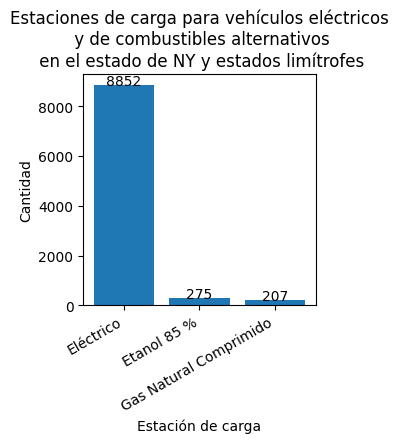

In [954]:
plt.figure(figsize=(3,3))
df_tipo_combustible = df.groupby('Fuel Type Code').size().reset_index(name='Cantidad').sort_values(by='Cantidad', ascending=False).head(3)
df_tipo_combustible['Fuel Type Code'] = df_tipo_combustible['Fuel Type Code'].replace('ELEC', 'Eléctrico').replace('E85', 'Etanol 85 %').replace('CNG', 'Gas Natural Comprimido')
plt.bar(df_tipo_combustible['Fuel Type Code'], df_tipo_combustible['Cantidad'])
plt.xlabel('Estación de carga')
plt.ylabel('Cantidad')
plt.xticks(rotation=30, ha='right')
plt.title('Estaciones de carga para vehículos eléctricos\n y de combustibles alternativos\n en el estado de NY y estados limítrofes')
for i, cantidad in enumerate(df_tipo_combustible['Cantidad']):
    plt.text(df_tipo_combustible['Fuel Type Code'].iloc[i], cantidad + 0.1, str(cantidad), ha='center')
plt.show()

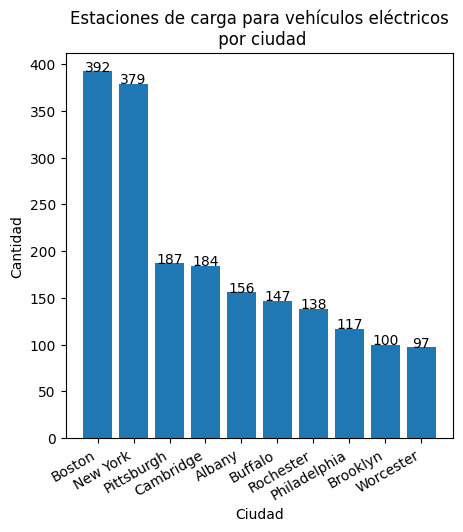

In [955]:
plt.figure(figsize=(5,5))
df_ciudades = df_elec.groupby('City')['ID'].count().reset_index(name='Cantidad').sort_values(by='Cantidad', ascending=False).head(10)
plt.bar(df_ciudades['City'], df_ciudades['Cantidad'])
plt.xlabel('Ciudad')
plt.ylabel('Cantidad')
plt.xticks(rotation=30, ha='right')
plt.title('Estaciones de carga para vehículos eléctricos\n por ciudad')
for i, cantidad in enumerate(df_ciudades['Cantidad']):
    plt.text(df_ciudades['City'].iloc[i], cantidad + 0.1, str(cantidad), ha='center')
plt.show()

In [956]:
import numpy as np

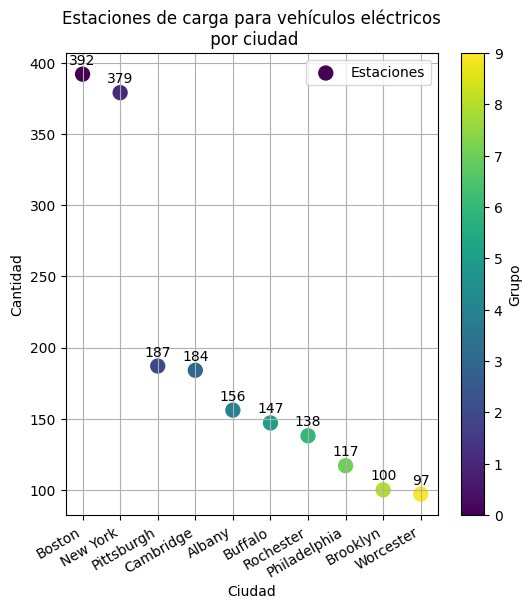

In [957]:
plt.figure(figsize=(6,6))
df_ciudades = df_elec.groupby('City')['ID'].count().reset_index(name='Cantidad').sort_values(by='Cantidad', ascending=False).head(10)
ciudades = df_ciudades['City']
cantidad = df_ciudades['Cantidad']
colors = np.arange(len(ciudades))
plt.scatter(ciudades, cantidad, c=colors, cmap='viridis', s=100, label='Estaciones')
plt.xlabel('Ciudad')
plt.ylabel('Cantidad')
plt.xticks(rotation=30, ha='right')
plt.title('Estaciones de carga para vehículos eléctricos\n por ciudad')
for i, ciudad in enumerate(ciudades):
    plt.text(ciudad, cantidad.iloc[i] + 7, str(cantidad.iloc[i]), ha='center')
plt.legend()
plt.colorbar(label='Grupo')
plt.grid(True)
plt.show()

Usar el de barras, se entiende mejor.

In [958]:
import folium

# Estaciones de carga para vehículos eléctricos

In [959]:
df_latitud_longitud = df[df['Fuel Type Code']=='ELEC']
centro = [40.74078, -73.9998]
m = folium.Map(location=centro, zoom_start=12, width='70%', height='70%')
for lat, lon, city in zip(df_latitud_longitud['Latitude'], df_latitud_longitud['Longitude'], df_latitud_longitud['City']):
    folium.CircleMarker(location=[lat, lon], radius=1, color='green', fill=True,  fill_opacity=0.01).add_to(m)
m